In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D

In [2]:
samara_df = pd.read_excel('data/epid_data.xlsx', sheet_name='samara')
chelyabinsk_df = pd.read_excel('data/epid_data.xlsx', sheet_name='chelyabinsk')


samara_by_years = []
chelyabinsk_by_years = []

for i in range(11):
    samara_by_years.append(np.array(samara_df['epid_data'])[26+52*(i-1):26+52*i]/np.array(samara_df['total'])[26+52*(i-1):26+52*i]*100000)
    chelyabinsk_by_years.append(np.array(chelyabinsk_df['epid_data'])[26+52*(i-1):26+52*i]/np.array(chelyabinsk_df['total'])[26+52*(i-1):26+52*i]*100000)

samara_by_years = samara_by_years[1:]
chelyabinsk_by_years = chelyabinsk_by_years[1:]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


1.6636496639532323


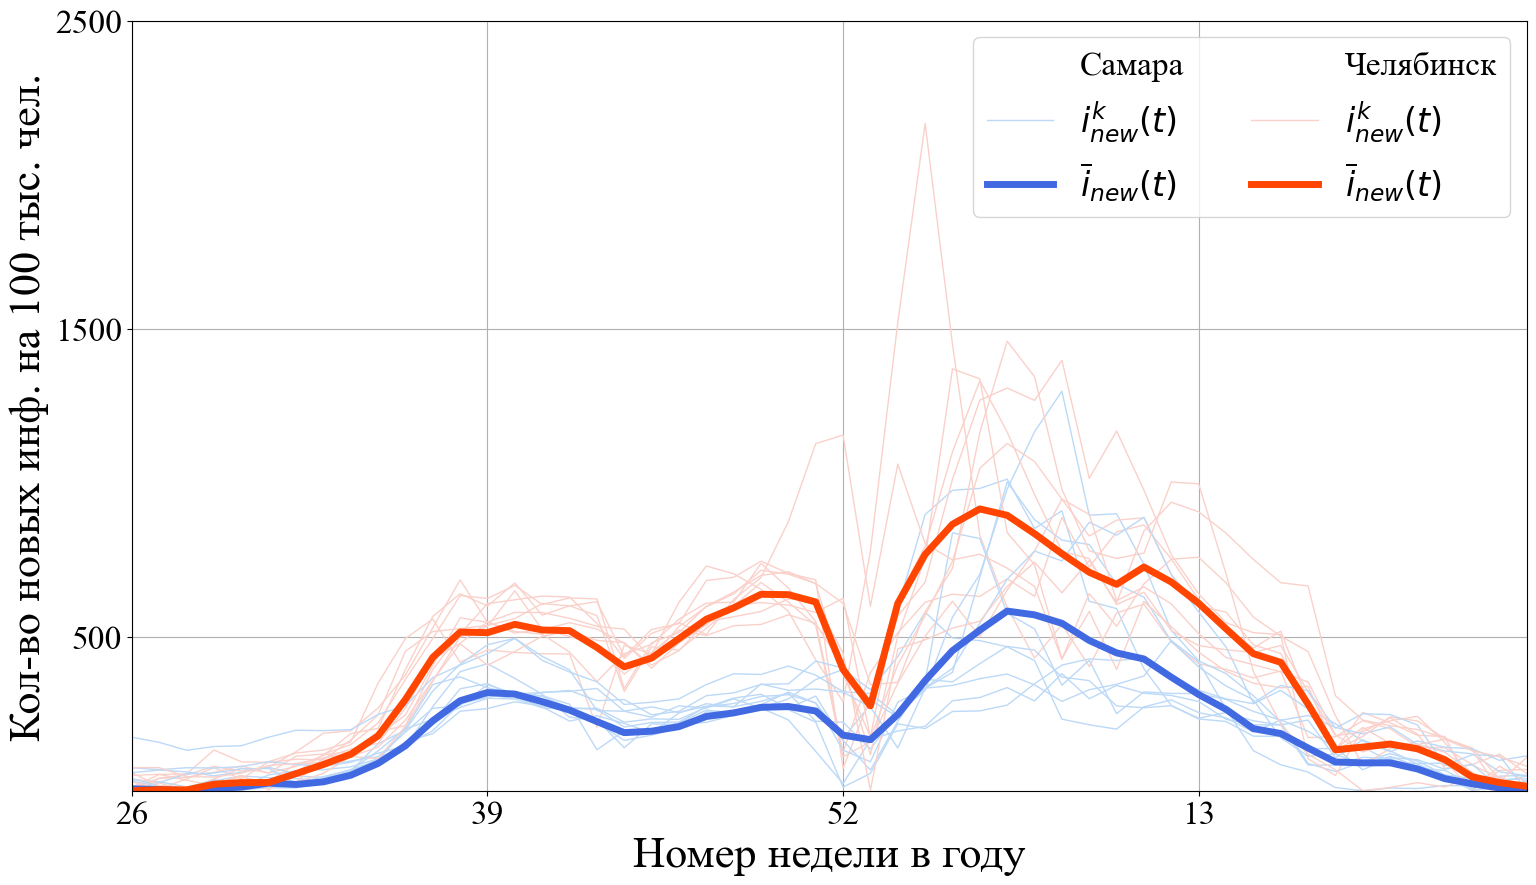

In [4]:
title_font_size = 40 
axis_font_size = 32 
ticks_font_size = 24 
legend_font_size = 24 
title_pad = 10 


matplotlib.pyplot.rcParams.update({
    'font.family' : 'Times New Roman',
    })

fig, ax = plt.subplots(figsize=(18,10))


mean_samara = np.mean(samara_by_years, axis=0)
mean_chelyabinsk = np.mean(chelyabinsk_by_years, axis=0)


for year in range(2010, 2020):
    year_index = year - 2010
    ax.plot(samara_by_years[year_index] - min(samara_by_years[year_index]), color = '#bcd9f7', linewidth=1)
    ax.plot(chelyabinsk_by_years[year_index] - min(chelyabinsk_by_years[year_index]), color = '#fad1ca', linewidth=1)


ax.plot([], [], ' ')
ax.plot(mean_samara - min(mean_samara), lw=5, color='royalblue')
ax.plot([], [], ' ')
ax.plot(mean_chelyabinsk - min(mean_chelyabinsk), lw=5, color='orangered')

ax.set_ylabel('Кол-во новых инф. на 100 тыс. чел.', fontsize=axis_font_size)
ax.set_xlabel('Номер недели в году', fontsize=axis_font_size)
ax.set_xlim([0,51])
ax.set_ylim([0,2500])
ax.grid()
x_ticks = [13*i for i in range(int(4))]
ax.set_xticks(x_ticks)
ax.set_xticklabels([26,39,52, 13], fontsize=ticks_font_size)
y_ticks = [500, 1500, 2500]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=ticks_font_size)
custom_lines = [Line2D([0], [0], color='#ffffff', lw=1),
    Line2D([0], [0], color='#bcd9f7', lw=1),
    Line2D([0], [0], color='royalblue', lw=5),
    Line2D([0], [0], color='#ffffff', lw=1),
    Line2D([0], [0], color='#fad1ca', lw=1),
    Line2D([0], [0], color='orangered', lw=5)]



ax.legend(custom_lines, ['Самара', '$i^{k}_{new}(t)$' , '$\overline{i}_{new}(t)$', 
                         'Челябинск', '$i^{k}_{new}(t)$' , '$\overline{i}_{new}(t)$'], fontsize=legend_font_size, ncol=2)

print(max(mean_chelyabinsk)/max(mean_samara))
fig.savefig('output/Korzin_fig2.eps', format='eps', bbox_inches='tight')
fig.savefig('output/Korzin_fig2.png', dpi=600, bbox_inches='tight')
fig.savefig('output/Korzin_fig2.pdf', dpi=600, bbox_inches='tight')